In [480]:
##Importing most of the libraries we have used in our assignments that we will use in this project

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from matplotlib.colors import ListedColormap
from numpy import array
from numpy import argmax

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt



# Read in the CSV file we will be using for this project 
df = pd.read_csv("./AB_NYC_2019.csv")
df[0::10]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
30,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,2019-06-01,2.04,3,355
40,12192,ENJOY Downtown NYC!,46978,Edward,Manhattan,East Village,40.72290,-73.98199,Private room,68,2,245,2019-06-21,2.08,2,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48850,36455584,Large studio at Union Square! for 3-5 ppl,50812891,Molo,Manhattan,East Village,40.73231,-73.98689,Entire home/apt,159,1,0,NaN,NaN,1,166
48860,36468386,纽约罗岛Roosevelt Island整租或合租 窗外美景 设施全 家具新 到曼哈顿方便 ...,228268650,Yan,Manhattan,Roosevelt Island,40.76688,-73.94688,Entire home/apt,145,1,0,NaN,NaN,1,30
48870,36474911,"Cozy, clean Williamsburg 1- bedroom apartment",1273444,Tanja,Brooklyn,Williamsburg,40.71197,-73.94946,Entire home/apt,99,4,0,NaN,NaN,1,22
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,NaN,NaN,3,365


## Data analysis

In [481]:
# Price
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [482]:
# neighbourhood groups
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [483]:
# Avg Price in neighbourhood groups
avg_price = df.groupby("neighbourhood_group")["price"].mean()

print(avg_price)

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


# Replacing NaN values with values of Zero
In our data there were some values like price that are of value NaN so we are replacing them with zero

In [484]:

#Replace the Nan values in last_review and reviews_per_month colum with 0
df[['last_review','reviews_per_month']] = df[['last_review','reviews_per_month']].replace(np.nan, 0)
#check data to make sure the change occured
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [485]:
#check all the numerical value data
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Dropping listing with price of zero (free listings)
We drop the rental listings with price zero because they are free listings and we don't want them affecting the rest of the data predictions, also we are concerned with predicting a properties price and not whether it should be free so these listings have no concern to us

In [486]:
#get rid of any listing that has obtained $0 for price
df = df[df.price != 0].copy()
#df = df[df.price < 601].copy()
#df =df[df.minimum_nights > 100].copy()
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# Inspecting columns with labels and how many they have for encoding

Some columns have labels and this is fine because we can one hot enccode them but if there are a lot of variations in the labels than we don't want to include them in the data frame. We want to keep the number of feature columns low.

In [487]:
df['name'].value_counts()

Hillside Hotel                                     18
Home away from home                                17
New york Multi-unit building                       16
Brooklyn Apartment                                 12
Private Room                                       11
                                                   ..
Bright New York Loft in Williamsburg/Bushwick       1
Spacious, Bright, Brooklyn Beauty                   1
2 Bedrooms in Shared Family Home 15 Min frm JFK     1
Studio in Midtown West                              1
Private room in Williamsburg Brooklyn               1
Name: name, Length: 47894, dtype: int64

In [488]:
df['neighbourhood_group'].value_counts()

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [489]:
df['neighbourhood'].value_counts()

Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
                      ... 
Fort Wadsworth           1
New Dorp                 1
Richmondtown             1
Willowbrook              1
Rossville                1
Name: neighbourhood, Length: 221, dtype: int64

In [490]:
df['room_type'].value_counts()

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64

# One hot encode "room_type"

Room type only has 3 different labels so we encode them here and will drop the original column from the table

In [491]:
#one hot encoding  of room type

# !!! DONT RUN TWICE IT WILL KEEP CONCATING THE HOT ENCODED LABELS !!!
df = pd.concat([df,pd.get_dummies(df['room_type'])],axis=1)
df.head()
# !!! DONT RUN TWICE IT WILL KEEP CONCATING THE HOT ENCODED LABELS !!!

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,0,0


In [492]:
#Drop the Room type column
df = df.drop(columns=['room_type'])
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,150,3,0,0,0.00,1,365,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,1,0,0


# One hot encode "neighbourhood_group"

The neighbourhood group only has five values so we encode and drop the original column

In [493]:
#one hot encode neighbourhood group
# !!! DONT RUN TWICE IT WILL KEEP CONCATING THE HOT ENCODED LABELS !!!
df = pd.concat([df,pd.get_dummies(df['neighbourhood_group'])],axis=1)
# !!! DONT RUN TWICE IT WILL KEEP CONCATING THE HOT ENCODED LABELS !!!
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,...,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,149,1,...,6,365,0,1,0,0,1,0,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,225,1,...,2,355,1,0,0,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,150,3,...,1,365,0,1,0,0,0,1,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,89,1,...,1,194,1,0,0,0,1,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,80,10,...,1,0,1,0,0,0,0,1,0,0


In [494]:
#dropped the neighbourhood group after encoding it
df = df.drop(columns =['neighbourhood_group'])
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,...,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,149,1,9,...,6,365,0,1,0,0,1,0,0,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,2,355,1,0,0,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,150,3,0,...,1,365,0,1,0,0,0,1,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,1,194,1,0,0,0,1,0,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,1,0,1,0,0,0,0,1,0,0


In [495]:

#dropping the id, host id, host name since it should have no affect on the price of the listing
df = df.drop(columns = ['id','host_id','host_name'])
df.head()

,name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,Clean & quiet apt home by the park,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,1,0,0,0
1,Skylit Midtown Castle,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,1,0,0,0,0,1,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,Harlem,40.80902,-73.94190,150,3,0,0,0.00,1,365,0,1,0,0,0,1,0,0
3,Cozy Entire Floor of Brownstone,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,1,0,0,0,1,0,0,0
4,Entire Apt: Spacious Studio/Loft by central park,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,1,0,0,0,0,1,0,0


In [496]:
names = df['name'].iloc[1]
print(names)
neigh = df['neighbourhood']
#print(neigh[0])
neigh_listA = []
for x in neigh:
    if x not in neigh_listA:
        neigh_listA.append(x)
        
print(len(neigh_listA))

Skylit Midtown Castle
221


# Encoding "name", prepping data

So as part of the requirment for this project the TA instructed us we had to use name some how in the prediction process so what we are going to do is encode name if it contains any of the 20 most frequently used words to describe a property.

We first make a list of all the words we don't want so we are taking out neighbourhood names, punctuations, numbers, and any stop words such as (is, at , the ,I, etc.)

we than use the NLTK library to get the most frequent words, I had to refine them a little cause it kept giving words that weren't used for description. We also print a table with the words most frequently used with their indexes that correspond to the graph below and it shows how many times they appear.

If any name contains any of the words the get a 1 if not they get 0, its very rudimentry but it works and keeps the columns down.

In [497]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

redundant_words = ['room','apartment','bedroom','1','2','!',',','&','.','-',')','(',
                  'apt','studio','loft','w/','+','*','brooklyn','manhattan','nyc','east',
                  'west','south','north','3','Bronx', 'Queens','Staten Island','1br','bed','near',
                  'williamsburg','bushwick','side','midtown','lower','upper','one','brownstone','br',
                  'home','location','harlem','square']
top_words = 20
txt = df.name.str.lower().str.replace(r'\|',' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords_t = nltk.corpus.stopwords.words('english')
stopwords_t.extend(redundant_words)
stopwords_t.extend(neigh_listA)
words_notstop_dist = nltk.FreqDist(w for w in words if w not in stopwords_t)

rslt = pd.DataFrame(words_notstop_dist.most_common(top_words),columns=['Word','Freq'])
print("Frequency of top occuring words")
print("-------------------------------")
print(rslt)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\edwar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edwar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Frequency of top occuring words
-------------------------------
         Word  Freq
0     private  7170
1        cozy  5035
2    spacious  3743
3        park  3050
4       sunny  2903
5   beautiful  2489
6     village  2246
7       heart  2050
8       large  2049
9      modern  1783
10    central  1760
11     bright  1700
12     luxury  1672
13        new  1547
14   charming  1377
15      quiet  1224
16      great  1155
17      clean  1117
18      close  1034
19       huge   961


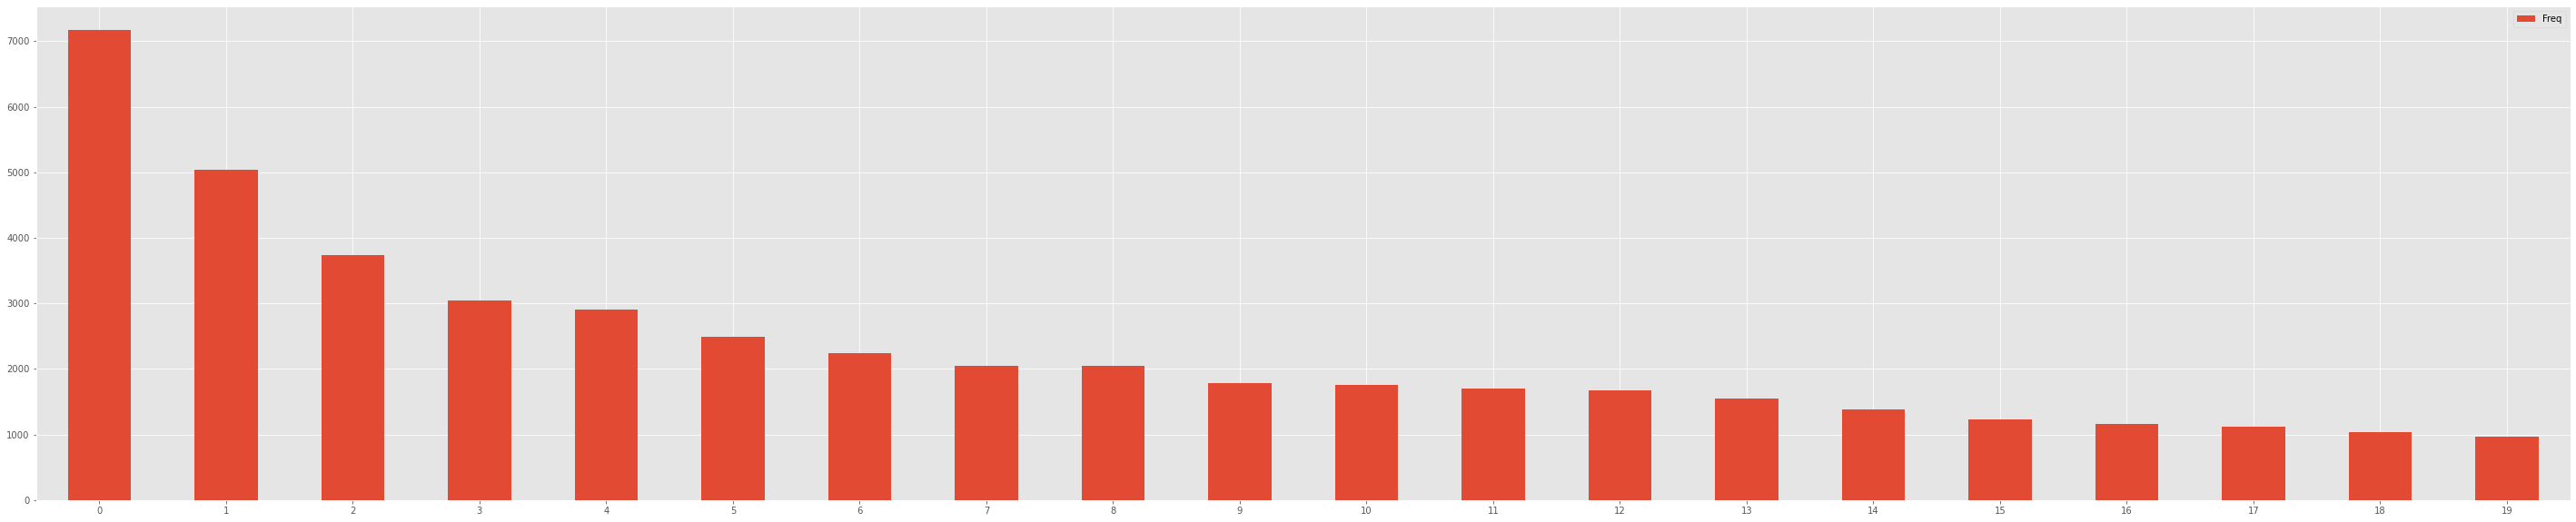

In [498]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot')
rslt.plot.bar(rot=0)

In [499]:
freq_words = ['private','cozy','spacious','park','sunny',
              'beautiful','village','heart','large','modern',
             'central','bright','luxury','new','charming',
             'quiet','great','clean','close','huge']
#want to lower case all the words in my previous stopwords_t list
l = [item.lower() for item in stopwords_t]

def encode_names(name,fword,stops):
    
    word_counter = 0
    stoppingwords = stops
    txt = nltk.tokenize.word_tokenize(str(name).lower())
    ready_txt =[x for x in txt if x not in stops]
    
    for word in ready_txt:
        if word in fword:
            return 1
        else:
            continue
            
    return 0



print(len(df.index))

name_df = []


name_df = df['name'].apply(lambda x : encode_names(x,freq_words,l))

name_df[::]


48884


0        1
1        0
2        1
3        1
4        1
        ..
48890    1
48891    0
48892    1
48893    0
48894    1
Name: name, Length: 48884, dtype: int64

In [500]:
df['name_encode'] = name_df
df.head()

,name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,name_encode
0,Clean & quiet apt home by the park,Kensington,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,1,0,0,1,0,0,0,1
1,Skylit Midtown Castle,Midtown,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,1,0,0,0,0,1,0,0,0
2,THE VILLAGE OF HARLEM....NEW YORK !,Harlem,40.80902,-73.94190,150,3,0,0,0.00,1,365,0,1,0,0,0,1,0,0,1
3,Cozy Entire Floor of Brownstone,Clinton Hill,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,1,0,0,0,1,0,0,0,1
4,Entire Apt: Spacious Studio/Loft by central park,East Harlem,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,1,0,0,0,0,1,0,0,1


In [501]:
df = df.drop(columns = ['name','last_review'])
df.head()

,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,name_encode
0,Kensington,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0,1
1,Midtown,40.75362,-73.98377,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0,0
2,Harlem,40.80902,-73.94190,150,3,0,0.00,1,365,0,1,0,0,0,1,0,0,1
3,Clinton Hill,40.68514,-73.95976,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0,1
4,East Harlem,40.79851,-73.94399,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0,1


In [502]:
df = df.drop(columns = ['longitude','latitude'])
df.head()

,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,name_encode
0,Kensington,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0,1
1,Midtown,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0,0
2,Harlem,150,3,0,0.00,1,365,0,1,0,0,0,1,0,0,1
3,Clinton Hill,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0,1
4,East Harlem,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0,1


# We make a copy of the table and drop another column

We need to make another copy of the data frame for the classification models we are going to use and we will alter that copy again later. We also drop the neighbourhood column cause there are 221 neighbourhoods that we aren't going to encode

In [503]:

original_df = df.copy()
# !!! DONT RUN TWICE IT WILL KEEP CONCATING THE HOT ENCODED LABELS !!!
df = df.drop(columns=['neighbourhood'])

df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,name_encode
0,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0,1
1,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0,0
2,150,3,0,0.00,1,365,0,1,0,0,0,1,0,0,1
3,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0,1
4,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0,1


# Arriving at problems when running Linear regression

So at this point originally we thought we were all set to start running our regression models with our data. We were wrong we kept getting very large RMSE which we didn't want. We couldn't figure it out so we did some research on the issue, we saw some people making graphs of there data so they can see what was happening which is why we have graphs for all the non encoded columns.

# Data discovery

We found out that alot of our data was super skewed to the left and some articles were saying that the tail end of the skews were acting as outliers and pulling our predicitions one way. Some of the methods we tried to fix it is that our professor told us we could use a polynomial regression by squaring all our data and making new columns. We tried this and it still gave us the same result. The other method was using log transform on our data or use a different regression model. We log transform all our data and it ended up working, we also used another regression to see if it was consistant and it is.

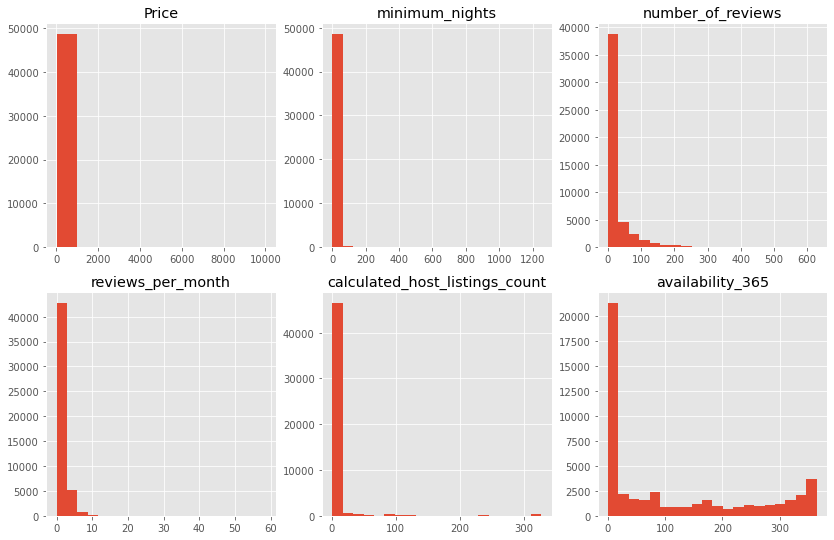

In [504]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 =fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)

ax1.hist(df.price)
ax1.set_title("Price")


ax2.hist(df.minimum_nights,bins = 20)
ax2.set_title("minimum_nights")
ax3.hist(df.number_of_reviews,bins = 20)
ax3.set_title("number_of_reviews")
ax4.hist(df.reviews_per_month,bins = 20)
ax4.set_title("reviews_per_month")
ax5.hist(df.calculated_host_listings_count,bins = 20)
ax5.set_title("calculated_host_listings_count")
ax6.hist(df.availability_365,bins = 20)
ax6.set_title("availability_365")
plt.show()

In [505]:
skews = ['minimum_nights','number_of_reviews','reviews_per_month',
         'calculated_host_listings_count','availability_365']

df['price']= np.log(df.price)
for x in skews:
    df[x] =np.log(df[x]+1)

In [506]:

original_df.head()

,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,name_encode
0,Kensington,149,1,9,0.21,6,365,0,1,0,0,1,0,0,0,1
1,Midtown,225,1,45,0.38,2,355,1,0,0,0,0,1,0,0,0
2,Harlem,150,3,0,0.00,1,365,0,1,0,0,0,1,0,0,1
3,Clinton Hill,89,1,270,4.64,1,194,1,0,0,0,1,0,0,0,1
4,East Harlem,80,10,9,0.10,1,0,1,0,0,0,0,1,0,0,1


# Split the Dataset

In [507]:
cols =['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month',
      'calculated_host_listings_count','availability_365','Entire home/apt','Private room',
      'Shared room','Bronx','Brooklyn','Manhattan','Queens','Staten Island','name_encode']

X = df.drop(['price'],axis=1).copy()
y = df['price'].copy()

X.head()

#for x in cols:
#    X[x + "_sq"] = X[x].apply(lambda x: pow(x,2))
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the first 5 lines
print(X_test)
print('\n')
print(y_test)


# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

       minimum_nights  number_of_reviews  reviews_per_month  \
0            0.693147           2.302585           0.190620   
1            0.693147           3.828641           0.322083   
2            1.386294           0.000000           0.000000   
3            0.693147           5.602119           1.729884   
4            2.397895           2.302585           0.095310   
...               ...                ...                ...   
48890        1.098612           0.000000           0.000000   
48891        1.609438           0.000000           0.000000   
48892        2.397895           0.000000           0.000000   
48893        0.693147           0.000000           0.000000   
48894        2.079442           0.000000           0.000000   

       calculated_host_listings_count  availability_365  Entire home/apt  \
0                            1.945910          5.902633                0   
1                            1.098612          5.874931                1   
2              

# Regression

In [508]:
original_df = original_df.drop(columns=['neighbourhood','reviews_per_month','calculated_host_listings_count'])

## Linear Regression

In [509]:

# In the following line, "my_LinReg" is instantiated as an "object" of LinearRegression "class"
my_LinReg = LinearRegression()

# Fitting the model to the training dataset
my_LinReg.fit(X_train, y_train)

# Printing Theta0 using attribute "intercept_":
print(my_LinReg.intercept_)

# Printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_LinReg.coef_)

4.403215019826869
[-0.1141992  -0.03790579 -0.07845288 -0.00329222  0.05197437  0.68275101
 -0.12448813 -0.55826288 -0.20451215  0.07610988  0.40666324 -0.07991474
 -0.19834623 -0.02989296]


In [510]:
# Predictions on the testing set
predict_price = my_LinReg.predict(X_test)


# NOT SURE IF NEEDED
# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, predict_price)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

#using a cross validation with 10 fold to confirm the accuracy of the RMSE
my_linreg = LinearRegression()
mse_list = cross_val_score(my_linreg,X,y,cv=10,scoring='neg_mean_squared_error')
print("\nUsing Cross Validation with 10 shuffles to confirm RMSE result")
print("-----------------------------------------------------------------")
print(mse_list)

pos_mse = -mse_list
rmse_list = np.sqrt(pos_mse)

print("\nThe Average RMSE Result from 10-fold Cross Validation ")
print("-----------------------------------------------------------------")
print("RMSE Average: " + str(rmse_list.mean()))

<bound method Series.mean of 0        5.003946
1        5.416100
2        5.010635
3        4.488636
4        4.382027
           ...   
48890    4.248495
48891    3.688879
48892    4.744932
48893    4.007333
48894    4.499810
Name: price, Length: 48884, dtype: float64>
[4.42737495 4.53364004 4.88830923 ... 5.03895961 4.12532653 4.04264889]
0.49556352410345467

Using Cross Validation with 10 shuffles to confirm RMSE result
-----------------------------------------------------------------
[-0.28091861 -0.22643176 -0.22542093 -0.23185441 -0.24632555 -0.24665668
 -0.23810686 -0.25252011 -0.25309834 -0.29031197]

The Average RMSE Result from 10-fold Cross Validation 
-----------------------------------------------------------------
RMSE Average: 0.49874917666747354


# Random Forest Regressor

In [511]:
# "my_randforest" is instantiated as an "object" of RandomForestRegressor "class". 
my_randforest = RandomForestRegressor()

# We can use the method "fit" of the objects "my_randforest" along with training dataset and labels to train the model.
my_randforest.fit(X_train,y_train)

# Testing on the testing set:
y_predict_rfr = my_randforest.predict(X_test)

print(y_predict_rfr)

# Calculating "Mean Square Error" (MSE):
mse_rfr= metrics.mean_squared_error(y_test,y_predict_rfr)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse_rfr = np.sqrt(mse_rfr)

print("RMSE Average: ",rmse_rfr)

[4.38229041 4.62507539 4.85803138 ... 4.96067919 4.30459323 4.12679765]
RMSE Average:  0.49313478059726595


## 10-Fold Cross Validation for Random Forest Regressor

In [512]:
# Applying 10-fold cross validation with "Random Forest Regressor":
my_randforest = RandomForestRegressor()
mse_list_rfr = cross_val_score(my_randforest, X, y, cv=10, scoring='neg_mean_squared_error')
#print(mse_list_rfr)

# in order to calculate root mean square error (rmse), we have to make them positive!
mse_list_positive_rfr = -mse_list_rfr

# using numpy sqrt function to calculate rmse:
rmse_list_rfr = np.sqrt(mse_list_positive_rfr )
#print(rmse_list_rfr)

# calculate the average RMSE as final result of cross validation:
print("RMSE Average: ",rmse_list_rfr.mean())


RMSE Average:  0.5102867305498944


In [513]:
#! pip install --user xgboost

# xgboost

4.727030887745868
RMSE Average:  0.4734831092747308
RMSPE: 9.984995962980015


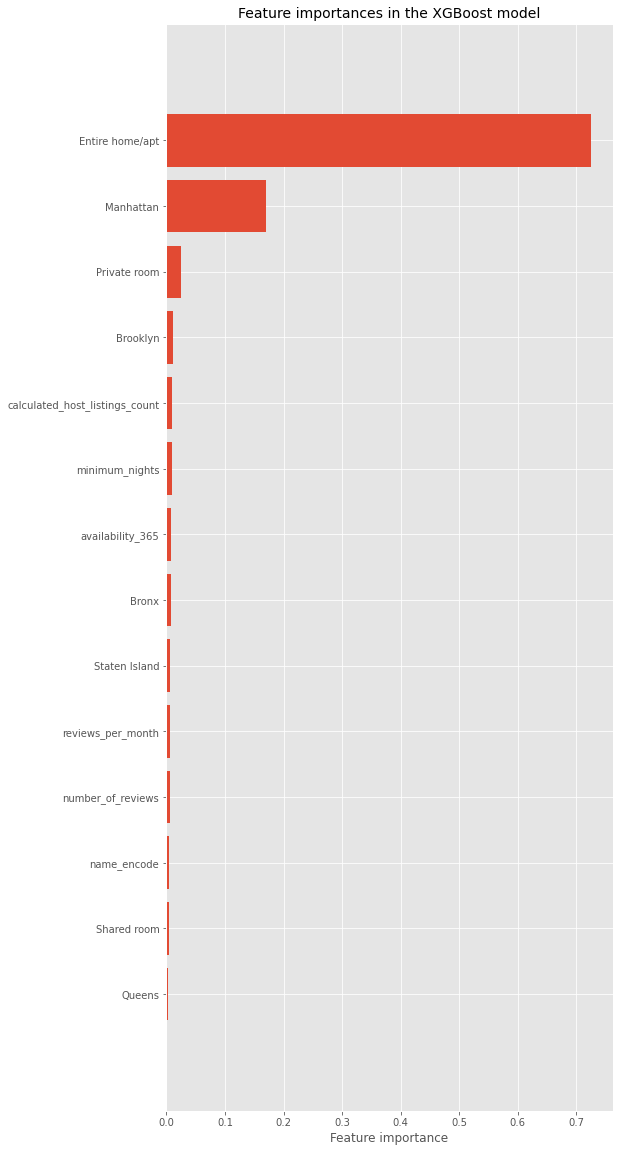

In [514]:
#pip install xgboost

import xgboost as xgb

# Fitting the model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Testing on the testing set:
y_predict_xgb = xgb_regressor.predict(X_test)

# Calculating "Mean Square Error" (MSE):
xgb_mse= metrics.mean_squared_error(y_test,y_predict_xgb)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
xgb_rmse = np.sqrt(xgb_mse)

print(y.mean())
print("RMSE Average: ",xgb_rmse)

#calculate the Root Mean Squared Percent Error
rmspe = (np.sqrt(np.mean(np.square((y_test - y_predict_xgb) /y_test)))) * 100
print('RMSPE:',rmspe)

training_preds_xgb_reg = xgb_regressor.predict(X_train)
y_predict_xgb = xgb_regressor.predict(X_test)

# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(xgb_regressor.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.1)



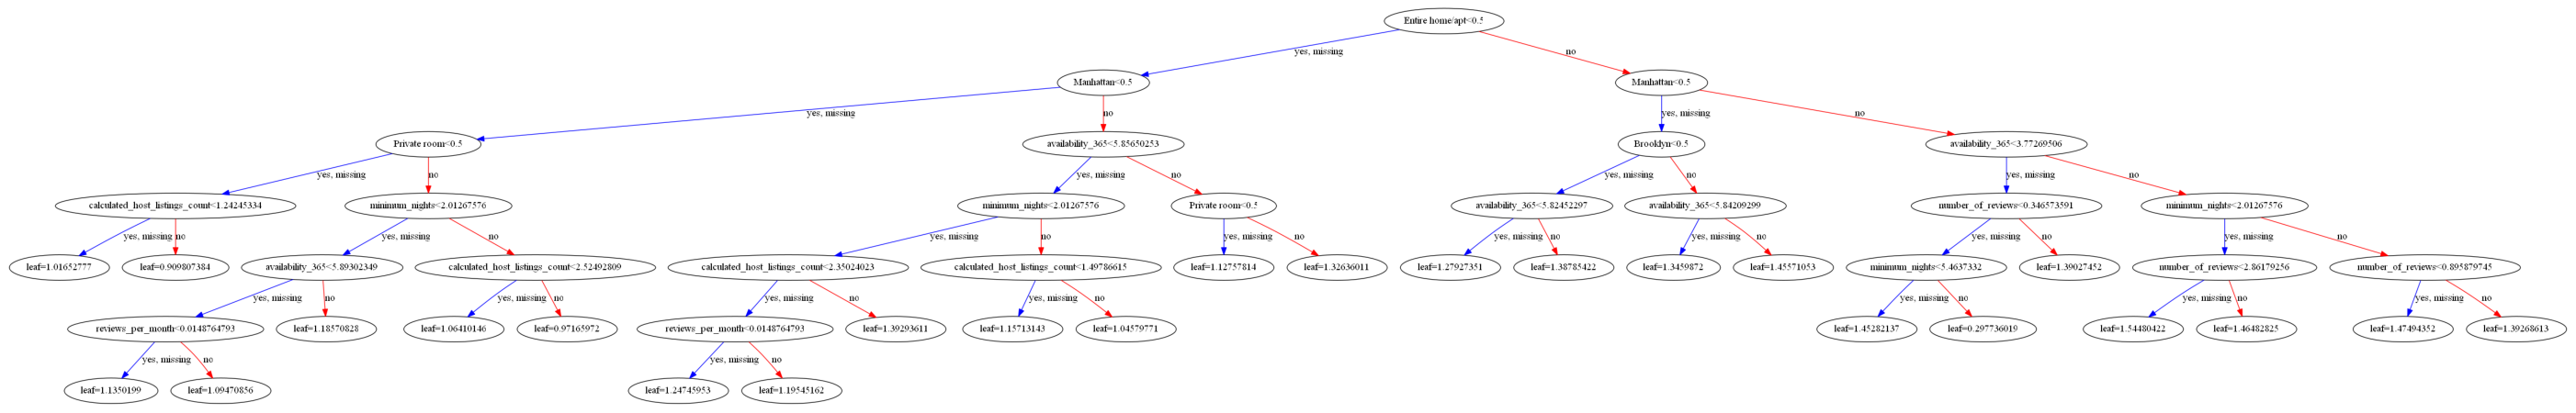

In [515]:
#INSTALL 'conda install graphviz python-graphviz'

xgb.plot_tree(xgb_regressor,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()


# Lasso Regressor

In [516]:
from sklearn.linear_model import Lasso

#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso(normalize=True)

#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,y_train)

#Predicting for X_test
y_predict_lass =lasso_reg.predict(X_test)

print(y_predict_lass)

# Calculating "Mean Square Error" (MSE):
lass_mse= metrics.mean_squared_error(y_test,y_predict_lass)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
lass_rmse = np.sqrt(lass_mse)

print("RMSE Average: ",lass_rmse)

[4.72820628 4.72820628 4.72820628 ... 4.72820628 4.72820628 4.72820628]
RMSE Average:  0.6932630258629601


## 10-Fold Cross Validation for Lasso Regressor

In [517]:
#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso(normalize=True)

# Applying 10-fold cross validation with "Lasso Regression":
mse_list_lasso = cross_val_score(lasso_reg, X, y, cv=10, scoring='neg_mean_squared_error')
#print(mse_list_lasso)

# in order to calculate root mean square error (rmse), we have to make them positive!
mse_list_positive_lasso = -mse_list_lasso 

# using numpy sqrt function to calculate rmse:
rmse_list_lasso = np.sqrt(mse_list_positive_lasso)
#print(rmse_list_lasso)

# calculate the average RMSE as final result of cross validation:
print("RMSE Average: ",rmse_list_lasso.mean())

RMSE Average:  0.6976712353343778


# Classifier models and Further data transforming

So we made a copy of the data prior here we refine it a little first we get ride of any extreme values we focus more on people who are just visiting the rental properties for a small amount of time, like vacationers or visiting family, etc. This is the majority of the types of listing in the data

We also need to make the target value a label so what we did was just alter them with a function, if a price is from 0-200 its a low value,201-400 a medium value, 400 and up is high.


In [518]:
original_df = original_df[original_df.price < 601].copy()
original_df =original_df[original_df.minimum_nights < 100].copy()
original_df.describe()

,price,minimum_nights,number_of_reviews,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,name_encode
count,47929.000000,47929.000000,47929.000000,47929.000000,47929.000000,47929.000000,47929.000000,47929.000000,47929.000000,47929.000000,47929.000000,47929.000000,47929.000000
mean,133.971896,6.102694,23.547810,111.155605,0.513927,0.462246,0.023827,0.022596,0.414822,0.437314,0.117632,0.007636,0.634167
std,93.666065,9.864806,44.813573,130.880266,0.499811,0.498578,0.152511,0.148613,0.492696,0.496060,0.322176,0.087053,0.481668
min,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,103.000000,2.000000,5.000000,43.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,175.000000,5.000000,24.000000,221.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,600.000000,99.000000,629.000000,365.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [519]:
original_df.head()

,price,minimum_nights,number_of_reviews,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,name_encode
0,149,1,9,365,0,1,0,0,1,0,0,0,1
1,225,1,45,355,1,0,0,0,0,1,0,0,0
2,150,3,0,365,0,1,0,0,0,1,0,0,1
3,89,1,270,194,1,0,0,0,1,0,0,0,1
4,80,10,9,0,1,0,0,0,0,1,0,0,1


In [520]:
def change_price(price):
    if price <= 200:
        return "Low"
    elif price <= 400:
        return "medium"
    else:
        return "high"
    
original_df['price'] = original_df['price'].apply(lambda x: change_price(x))


In [521]:
original_df.head()

,price,minimum_nights,number_of_reviews,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,name_encode
0,Low,1,9,365,0,1,0,0,1,0,0,0,1
1,medium,1,45,355,1,0,0,0,0,1,0,0,0
2,Low,3,0,365,0,1,0,0,0,1,0,0,1
3,Low,1,270,194,1,0,0,0,1,0,0,0,1
4,Low,10,9,0,1,0,0,0,0,1,0,0,1


# Split new copy of Data

In [522]:
X = original_df.drop(['price'],axis=1).copy()
y = original_df['price'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X.head()

,minimum_nights,number_of_reviews,availability_365,Entire home/apt,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,name_encode
0,1,9,365,0,1,0,0,1,0,0,0,1
1,1,45,355,1,0,0,0,0,1,0,0,0
2,3,0,365,0,1,0,0,0,1,0,0,1
3,1,270,194,1,0,0,0,1,0,0,0,1
4,10,9,0,1,0,0,0,0,1,0,0,1


# Random Forest Classifier

In [523]:
my_rf = RandomForestClassifier()
my_rf.fit(X_train,y_train)

y_predict_rf = my_rf.predict(X_test)
print(y_predict_rf)

accuracy_rf = accuracy_score(y_test, y_predict_rf)

print("The accuracy is " ,"{:.1f}".format(accuracy_rf*100), "%")

['Low' 'Low' 'Low' ... 'medium' 'Low' 'Low']
The accuracy is  83.3 %


# Logistic Regressioin

In [524]:
my_logreg = LogisticRegression(max_iter=10000)
my_logreg.fit(X_train,y_train)

lg_predict = my_logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test,lg_predict)
print("The accuracy is " ,"{:.1f}".format(accuracy_logreg*100), "%")

prob = my_logreg.predict_proba(X_test)

The accuracy is  84.5 %


# KNN

In [525]:
k_values = [1,3,5,7,11,15,27,50]

for x in k_values:
    k=x
    my_knn = KNeighborsClassifier(n_neighbors=k)
    my_knn.fit(X_train,y_train)
    y_predict = my_knn.predict(X_test)
    accuracy = accuracy_score(y_test,y_predict)
    print(f"For k = {k}, the accuracy is: ", "{:.1f}".format(accuracy*100), "%")

For k = 1, the accuracy is:  76.8 %
For k = 3, the accuracy is:  81.5 %
For k = 5, the accuracy is:  82.8 %
For k = 7, the accuracy is:  83.3 %
For k = 11, the accuracy is:  83.8 %
For k = 15, the accuracy is:  84.1 %
For k = 27, the accuracy is:  83.9 %
For k = 50, the accuracy is:  83.9 %


# Decision Tree

In [526]:
my_dtree = DecisionTreeClassifier()
my_dtree.fit(X_train,y_train)

predict = my_dtree.predict(X_test)
accuracy = accuracy_score(y_test,predict)
print("The accuracy is " ,"{:.1f}".format(accuracy*100), "%")

The accuracy is  81.0 %
